In [1]:
import nbimporter
import helper_methods as hm
import preprocessing as pp
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

Importing Jupyter notebook from helper_methods.ipynb
Importing Jupyter notebook from preprocessing.ipynb


### K-NN Regressor Implementation 

In [2]:
# This function was meant to train the data - but no explicit training in K-NN
def train(x, y):
    return

In [3]:
# This function takes in the training data and the feature values to the data sample to be predicted on. 
# Using the specified number of nearest neighbours, it returns the predicted value of the specificed data sample
def predict_one(x_train, y_train, x_test_point, k):
    distances = []
    for i in range(len(x_train)):
        # sum of square of distance of each feature - minkowski Distance with p = 2
        distance = ((x_train[i, :] - x_test_point)**2).sum()
        # apending the list of the distance for the point and its index to the list
        distances.append([distance, i])

    # Sorting using the distance from the sample point
    distances = sorted(distances)
    
    targets = []
    # Finding the values of the elements using the first 'k' elemets in the distances list i.e 'k' nearest neighbours
    for i in range(k):
        # list of the indices of the 'k' nearest neighbours
        index_of_training_data = distances[i][1]
        
        # adding the nearest neighbours to the targets list
        targets.append(y_train[index_of_training_data])
    
    # returns the mean value among the targets
    return sum(targets) / len(targets)

In [4]:
# This function takes in the training data, the data samples to be predicted upon and the value of k
# It return the predicted regression values of the data samples given to it for prediction
def predict(x_train, y_train, x_test_data, k):
    predictions = []
    
    # making prediction for the testing data samples
    for x_test in x_test_data:
        predictions.append(predict_one(x_train, y_train, x_test, k))
    return predictions

### Using CV to find Optimal parameters

Sorting list: https://stackoverflow.com/questions/17555218/python-how-to-sort-a-list-of-lists-by-the-fourth-element-in-each-list  

In [5]:
def print_parameters_accuracy(accuracies):
    print('#Features \t #Neighbours \t Accuracy')
    for i in range(len(accuracies)):
        print(accuracies[i][0], '\t\t', accuracies[i][1], '\t\t', accuracies[i][2])
    print()

In [6]:
def find_optimal_values(max_features, max_neighbours, num_folds = 10, symbol_name = 'AAPL'):
    accuracies = list()
    for num_features in range(4, max_features + 1, 4):
        print('Features:', num_features)
        
        X_train, X_test, Y_train, Y_test = hm.prepare_data(num_features, symbol_name)
        X_train, X_test, Y_train, Y_test = X_train.values, X_test.values, Y_train.values, Y_test.values
        
        for k_neighbours in range(5, max_neighbours + 1, 5):
            neighbour_accuracy = hm.timeSeriesCV(X_train, Y_train, num_folds, predict, [k_neighbours])
            accuracies.append([num_features, k_neighbours, neighbour_accuracy])
    
    print_parameters_accuracy(accuracies)
    
    # Sorting the accuracies
    accuracies.sort(reverse=True, key=lambda x: x[2])
    print_parameters_accuracy(accuracies)
    
    return accuracies[0][0], accuracies[0][1]

In [7]:
num_features, optimal_k = find_optimal_values(max_features=100, max_neighbours=100, num_folds=10, symbol_name = 'MSFT')

Features: 4
Parameters ------------------------> [5]
Parameters ------------------------> [10]
Parameters ------------------------> [15]
Parameters ------------------------> [20]
Parameters ------------------------> [25]
Parameters ------------------------> [30]
Parameters ------------------------> [35]
Parameters ------------------------> [40]
Parameters ------------------------> [45]
Parameters ------------------------> [50]
Parameters ------------------------> [55]
Parameters ------------------------> [60]
Parameters ------------------------> [65]
Parameters ------------------------> [70]
Parameters ------------------------> [75]
Parameters ------------------------> [80]
Parameters ------------------------> [85]
Parameters ------------------------> [90]
Parameters ------------------------> [95]
Parameters ------------------------> [100]
Features: 8
Parameters ------------------------> [5]
Parameters ------------------------> [10]
Parameters ------------------------> [15]
Parameters 

Parameters ------------------------> [70]
Parameters ------------------------> [75]
Parameters ------------------------> [80]
Parameters ------------------------> [85]
Parameters ------------------------> [90]
Parameters ------------------------> [95]
Parameters ------------------------> [100]
Features: 44
Parameters ------------------------> [5]
Parameters ------------------------> [10]
Parameters ------------------------> [15]
Parameters ------------------------> [20]
Parameters ------------------------> [25]
Parameters ------------------------> [30]
Parameters ------------------------> [35]
Parameters ------------------------> [40]
Parameters ------------------------> [45]
Parameters ------------------------> [50]
Parameters ------------------------> [55]
Parameters ------------------------> [60]
Parameters ------------------------> [65]
Parameters ------------------------> [70]
Parameters ------------------------> [75]
Parameters ------------------------> [80]
Parameters ----------

Parameters ------------------------> [30]
Parameters ------------------------> [35]
Parameters ------------------------> [40]
Parameters ------------------------> [45]
Parameters ------------------------> [50]
Parameters ------------------------> [55]
Parameters ------------------------> [60]
Parameters ------------------------> [65]
Parameters ------------------------> [70]
Parameters ------------------------> [75]
Parameters ------------------------> [80]
Parameters ------------------------> [85]
Parameters ------------------------> [90]
Parameters ------------------------> [95]
Parameters ------------------------> [100]
Features: 84
Parameters ------------------------> [5]
Parameters ------------------------> [10]
Parameters ------------------------> [15]
Parameters ------------------------> [20]
Parameters ------------------------> [25]
Parameters ------------------------> [30]
Parameters ------------------------> [35]
Parameters ------------------------> [40]
Parameters ----------

96 		 100 		 -0.005862574190761922
100 		 90 		 -0.0058653026434813465
84 		 95 		 -0.006240985581935766
96 		 95 		 -0.006241739748596554
76 		 85 		 -0.006393966230702579
60 		 70 		 -0.006395368689117078
100 		 95 		 -0.006433069192112765
20 		 90 		 -0.006440958969605257
88 		 90 		 -0.006463003331030004
76 		 100 		 -0.006464723599430338
84 		 100 		 -0.006491428625141836
100 		 80 		 -0.006532742854722483
84 		 55 		 -0.006535067287155163
96 		 85 		 -0.0065508483756102015
96 		 80 		 -0.006626939508477172
76 		 95 		 -0.006630392106466444
88 		 85 		 -0.00668880991259556
44 		 85 		 -0.006713470520932148
88 		 70 		 -0.006738437920513146
20 		 85 		 -0.006741323977961061
92 		 90 		 -0.006808775721122904
80 		 100 		 -0.0068399233839023426
20 		 100 		 -0.006880185750692812
40 		 90 		 -0.006975641133305362
100 		 75 		 -0.007008191939273711
40 		 100 		 -0.007024690051777588
40 		 95 		 -0.007030062248606805
40 		 75 		 -0.007170936810977506
84 		 50 		 -0.007183099559959537
40

In [8]:
X_train, X_test, Y_train, Y_test = hm.prepare_data(num_features)
X_train, X_test, Y_train, Y_test = X_train.values, X_test.values, Y_train.values, Y_test.values

### In-built KNN Regressor

In [9]:
k_neighbours = optimal_k
rgr = KNeighborsRegressor(n_neighbors=k_neighbours)
rgr.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=70, p=2,
          weights='uniform')

http://www.fairlynerdy.com/what-is-r-squared/

### Training and Predicting

In [10]:
k_neighbours = optimal_k
Y_pred = predict(X_train, Y_train, X_test, k_neighbours)
print('Mean Squared Error - k =', k_neighbours, '--', hm.mean_squared_error(Y_test, Y_pred))
print('Coeff of determination --', r2_score(Y_test, Y_pred))

Mean Squared Error - k = 70 -- 0.00034188096463800633
Coeff of determination -- -0.0010961224798782254


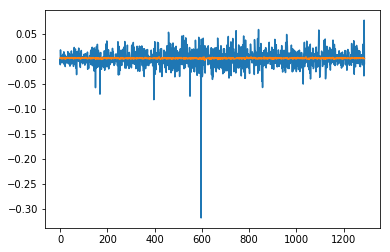

In [11]:
plt.plot(list(range(len(Y_test))), Y_test)
plt.plot(list(range(len(Y_test))), Y_pred)
plt.show()

In [12]:
print('In-Built KNN score - k =', k_neighbours, '--', rgr.score(X_test, Y_test))
Y_pred = rgr.predict(X_test)
print('Mean Squared Error - k =', k_neighbours, '--', hm.mean_squared_error(Y_test, Y_pred))

In-Built KNN score - k = 70 -- -0.0010961224798782254
Mean Squared Error - k = 70 -- 0.00034188096463800633
